Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import  StratifiedKFold


get data

In [6]:
dataTomClancy  = pd.read_csv('./rs6_clean.csv')
dataTomClancy.shape

(5035, 11)

In [7]:
dataTomClancy.head(2)

Unnamed: 0 player_name  kills  deaths  wins  losess         xp  headshots  \
0           0   imBrendyn  39693   27208  3963    2524   87180363      16789   
1           1  bestboy021  52978   31853  6332    2716  111206504      18196   

   melee_kills  games_played  time_played  
0          336          6487         2105  
1         1204          9048         2440

propreter des data

In [8]:
colonnes = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'melee_kills', 'games_played', 'time_played','wins']
GoodDataTomClancy = dataTomClancy[colonnes]
GoodDataTomClancy.head(3)

kills  deaths  losess         xp  headshots  melee_kills  games_played  \
0  39693   27208    2524   87180363      16789          336          6487   
1  52978   31853    2716  111206504      18196         1204          9048   
2  32141   31353    2892   89109230      12652          564          7417   

   time_played  wins  
0         2105  3963  
1         2440  6332  
2         2184  4525

test data

In [9]:
max_values = GoodDataTomClancy.max()
print("Valeurs maximales pour chaque colonne :")
print(max_values)

Valeurs maximales pour chaque colonne :
kills               86396
deaths              82231
losess              17403
xp              235629835
headshots           34098
melee_kills          2393
games_played        22904
time_played          5686
wins                13678
dtype: int64


In [10]:
mediane_wins = GoodDataTomClancy['wins'].median()
print(f"\nMédiane de 'wins': {mediane_wins}")


Médiane de 'wins': 2286.0


In [11]:

au_dessus_mediane = dataTomClancy[dataTomClancy['wins'] > mediane_wins]
print(f"\nMédiane de 'wins' au_dessus_mediane")
au_dessus_mediane.shape



Médiane de 'wins' au_dessus_mediane


(2516, 11)

In [12]:
en_dessous_mediane = dataTomClancy[dataTomClancy['wins'] <= mediane_wins]
print(f"\nMédiane de 'wins' en_dessous_mediane")
en_dessous_mediane.shape


Médiane de 'wins' en_dessous_mediane


(2519, 11)

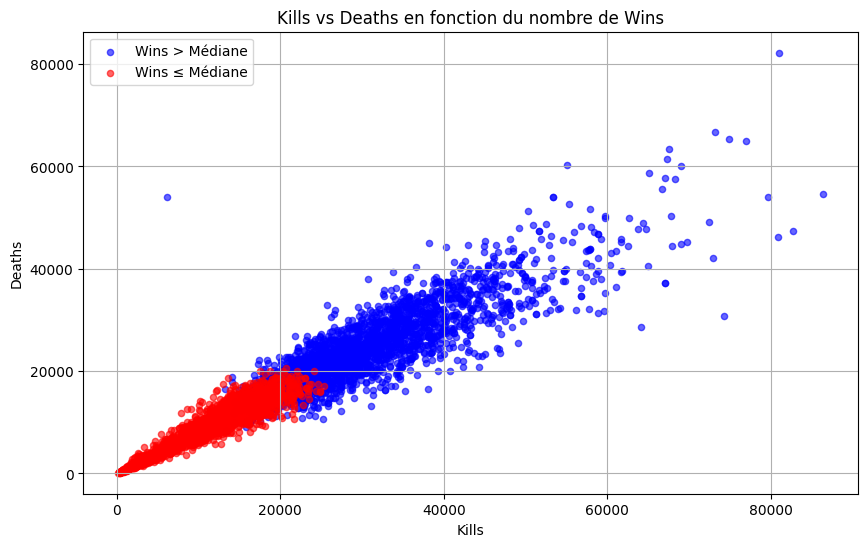

In [13]:
colors = {True: 'blue', False: 'red'}

fig, ax = plt.subplots(figsize=(10, 6))

for key, condition in [(True, dataTomClancy['wins'] > mediane_wins),
                       (False, dataTomClancy['wins'] <= mediane_wins)]:
    subset = dataTomClancy[condition] 
    subset.plot(
        ax=ax,
        kind='scatter',
        x='kills',
        y='deaths',
        label='Wins > Médiane' if key else 'Wins ≤ Médiane',
        color=colors[key],
        alpha=0.6
    )

plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('Kills vs Deaths en fonction du nombre de Wins')
plt.legend()
plt.grid(True)
plt.show()

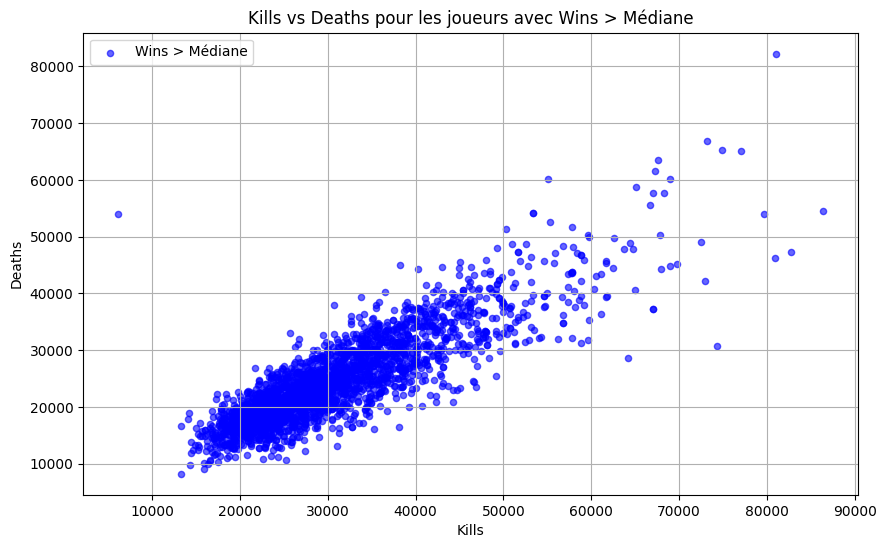

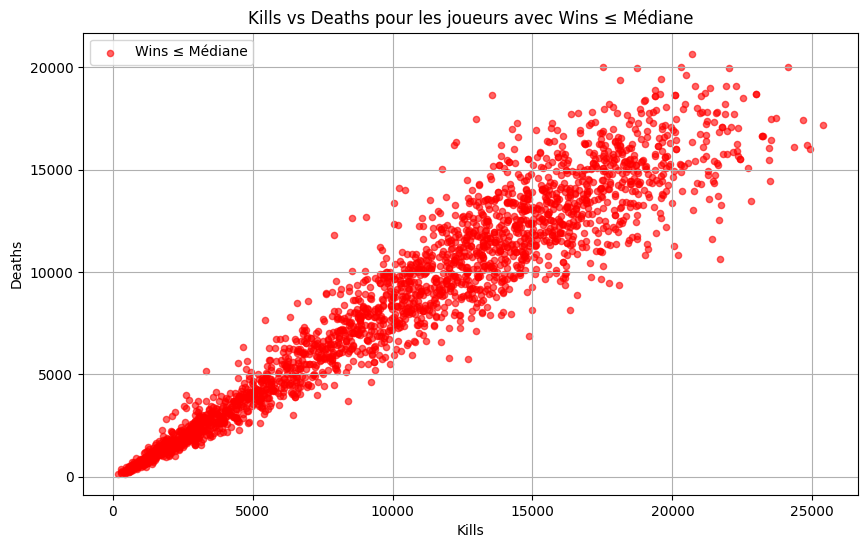

In [14]:
groups = [
    (au_dessus_mediane, 'Wins > Médiane', 'blue', 'Kills vs Deaths pour les joueurs avec Wins > Médiane'),
    (en_dessous_mediane, 'Wins ≤ Médiane', 'red', 'Kills vs Deaths pour les joueurs avec Wins ≤ Médiane')
]


for data, label, color, title in groups:
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(
        ax=ax,
        kind='scatter',
        x='kills',
        y='deaths',
        label=label,
        color=color,
        alpha=0.6
    )
    plt.xlabel('Kills')
    plt.ylabel('Deaths')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Corrélation des autres variables avec 'wins':
wins            1.000000
games_played    0.980924
time_played     0.967955
xp              0.967797
kills           0.966041
headshots       0.942601
deaths          0.937343
losess          0.889367
melee_kills     0.733176
Name: wins, dtype: float64


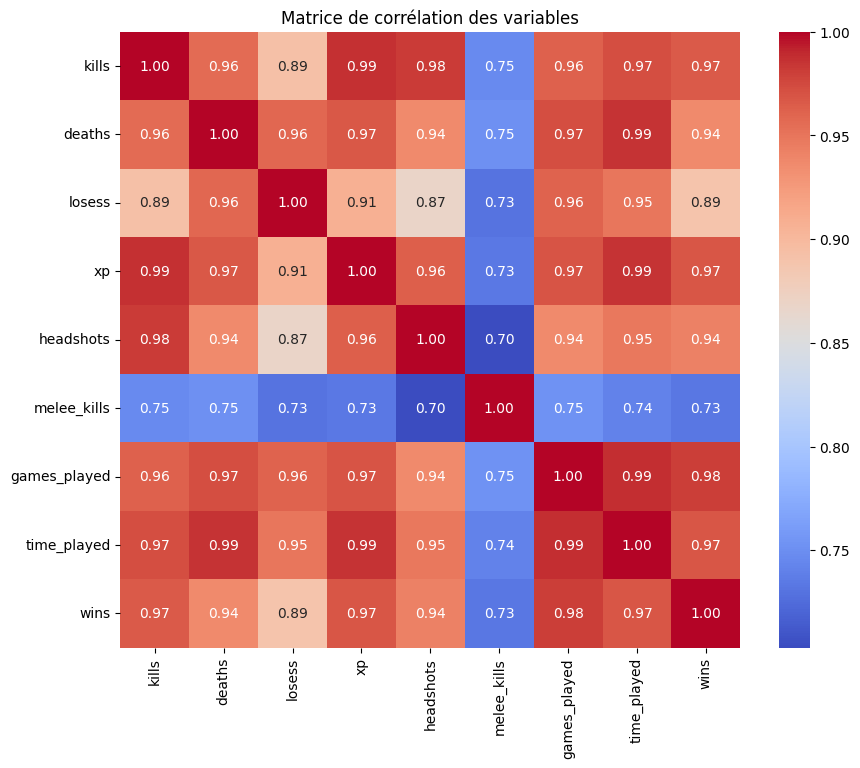

In [15]:
correlation_matrix = GoodDataTomClancy.corr()

correlation_with_wins = correlation_matrix['wins'].sort_values(ascending=False)
print("Corrélation des autres variables avec 'wins':")
print(correlation_with_wins)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables')
plt.show()

| Rang | Variable       | Corrélation avec `wins` | > 75% |
|------|----------------|-------------------------|-------|
| 1    | Kills         | 0.97                    | ✅    |
| 1    | XP            | 0.97                    | ✅    |
| 1    | Time Played   | 0.97                    | ✅    |
| 4    | Deaths        | 0.94                    | ✅    |
| 4    | Headshots     | 0.94                    | ✅    |
| 6    | Games Played  | 0.98                    | ✅    |
| 7    | Losess        | 0.89                    | ✅    |
| 8    | Melee Kills   | 0.73                    | ❌    |


1 Échantillon aléatoire : Nous prenons un échantillon aléatoire de 100 valeurs
2 Boucle pour chaque variable


In [16]:
variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played','wins']
GoodDataTomClancy =GoodDataTomClancy[variables]

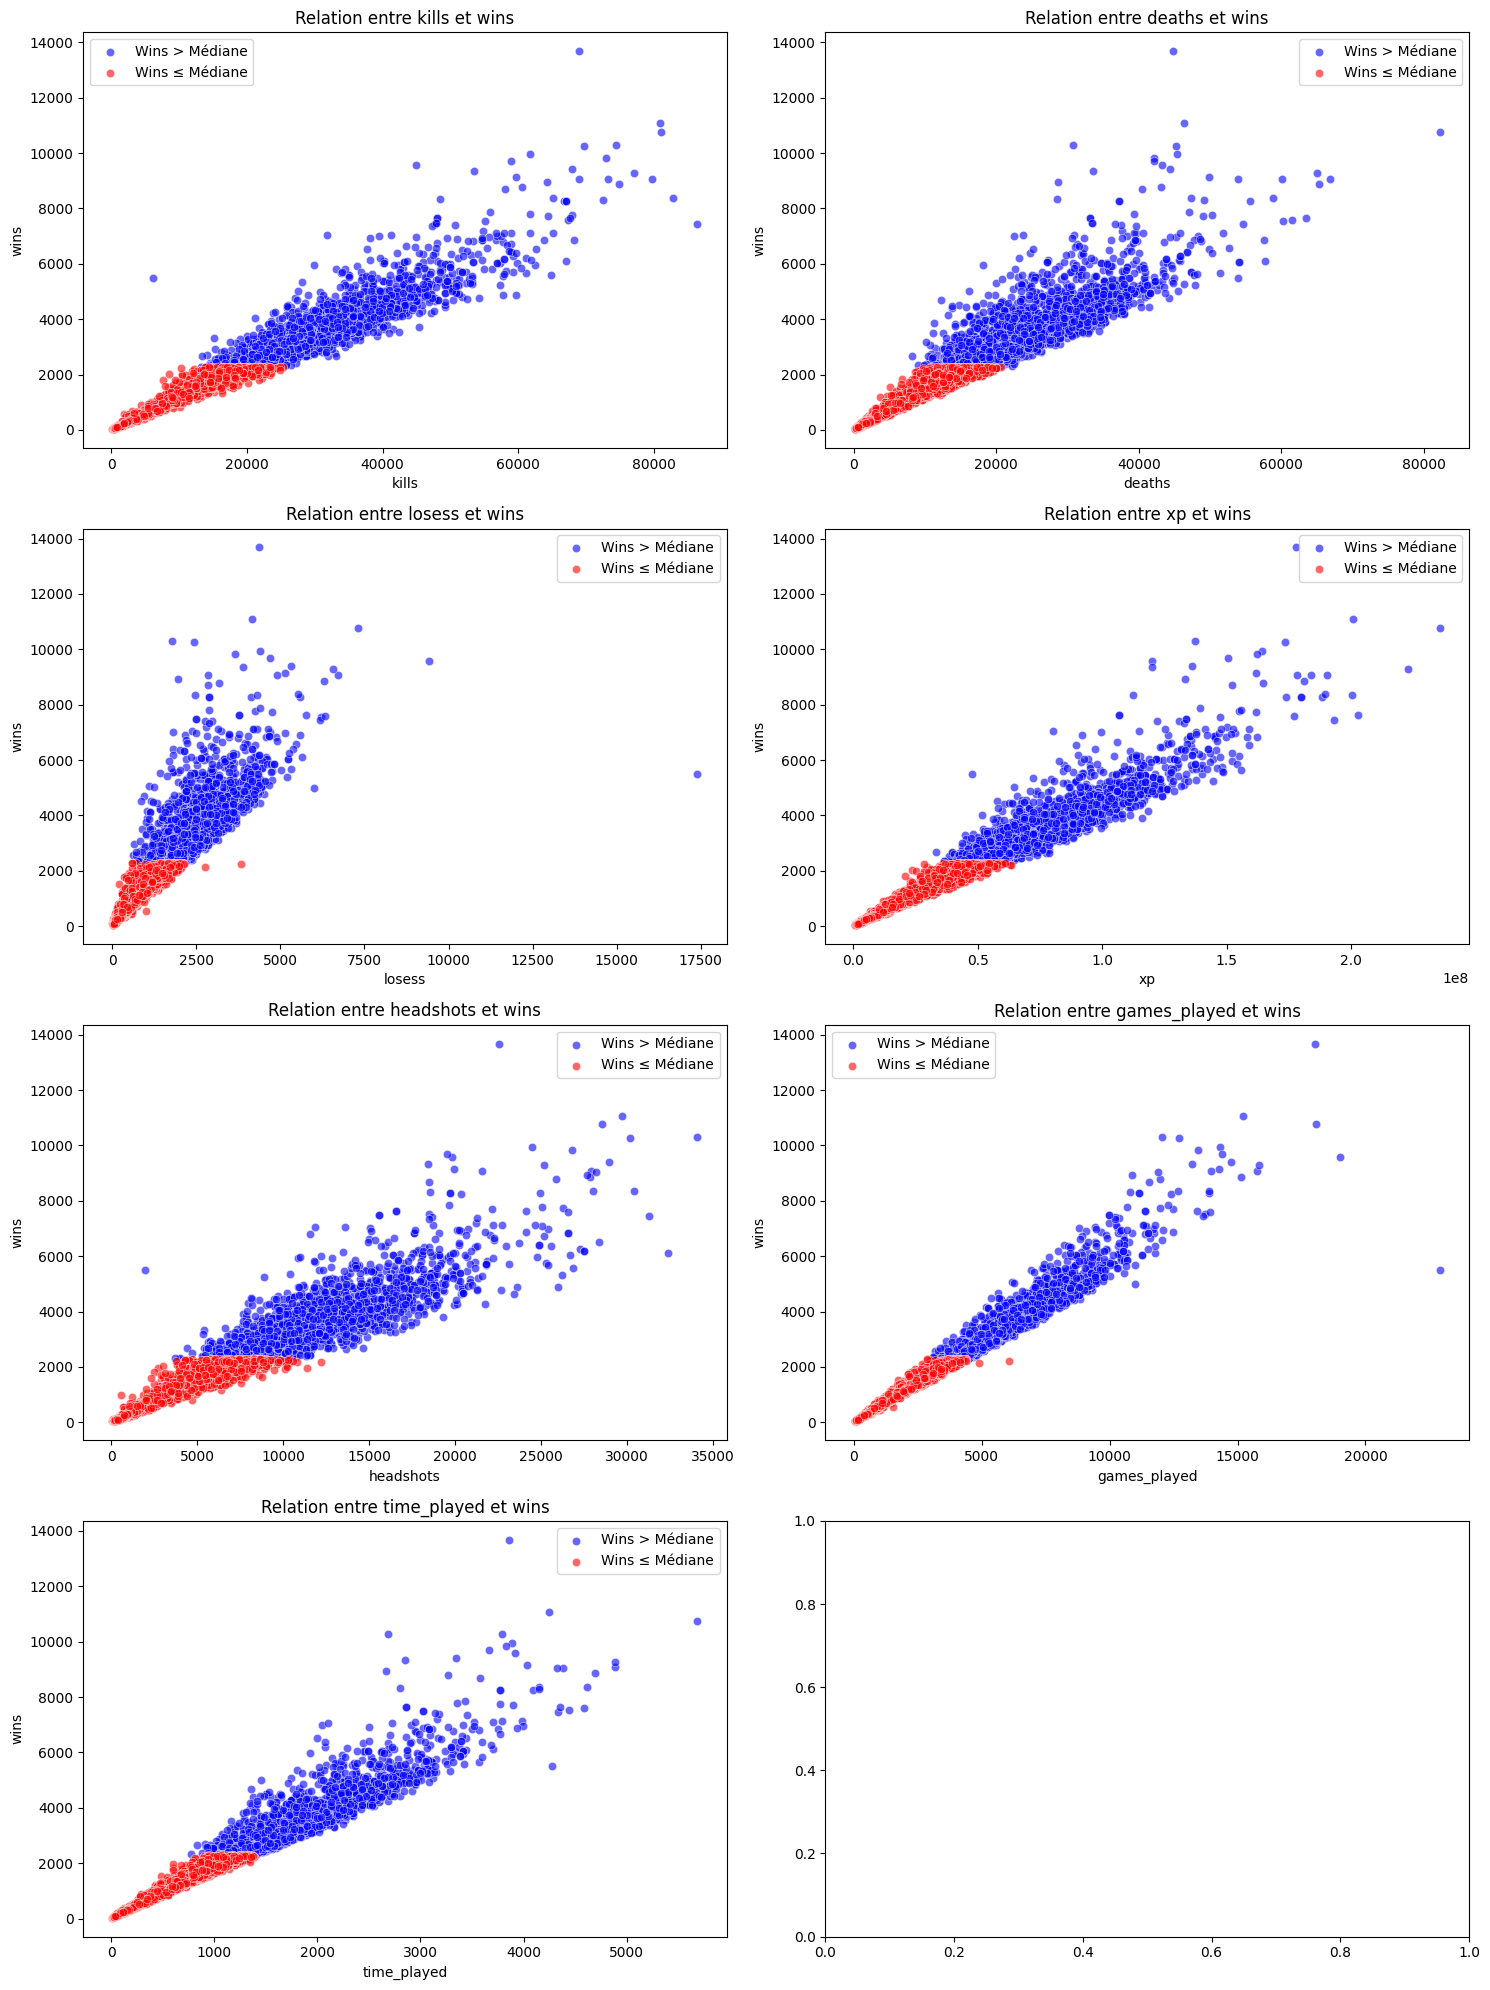

In [17]:

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    for key, condition in [(True, GoodDataTomClancy['wins'] > mediane_wins), 
                           (False, GoodDataTomClancy['wins'] <= mediane_wins)]:
        subset = GoodDataTomClancy[condition]
        color = 'blue' if key else 'red'
        label = 'Wins > Médiane' if key else 'Wins ≤ Médiane'
        sns.scatterplot(x=var, y='wins', data=subset, ax=axes[i], color=color, label=label, alpha=0.6)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [18]:
GoodDataTomClancy.head(3)

kills  deaths  losess         xp  headshots  games_played  time_played  \
0  39693   27208    2524   87180363      16789          6487         2105   
1  52978   31853    2716  111206504      18196          9048         2440   
2  32141   31353    2892   89109230      12652          7417         2184   

   wins  
0  3963  
1  6332  
2  4525

c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

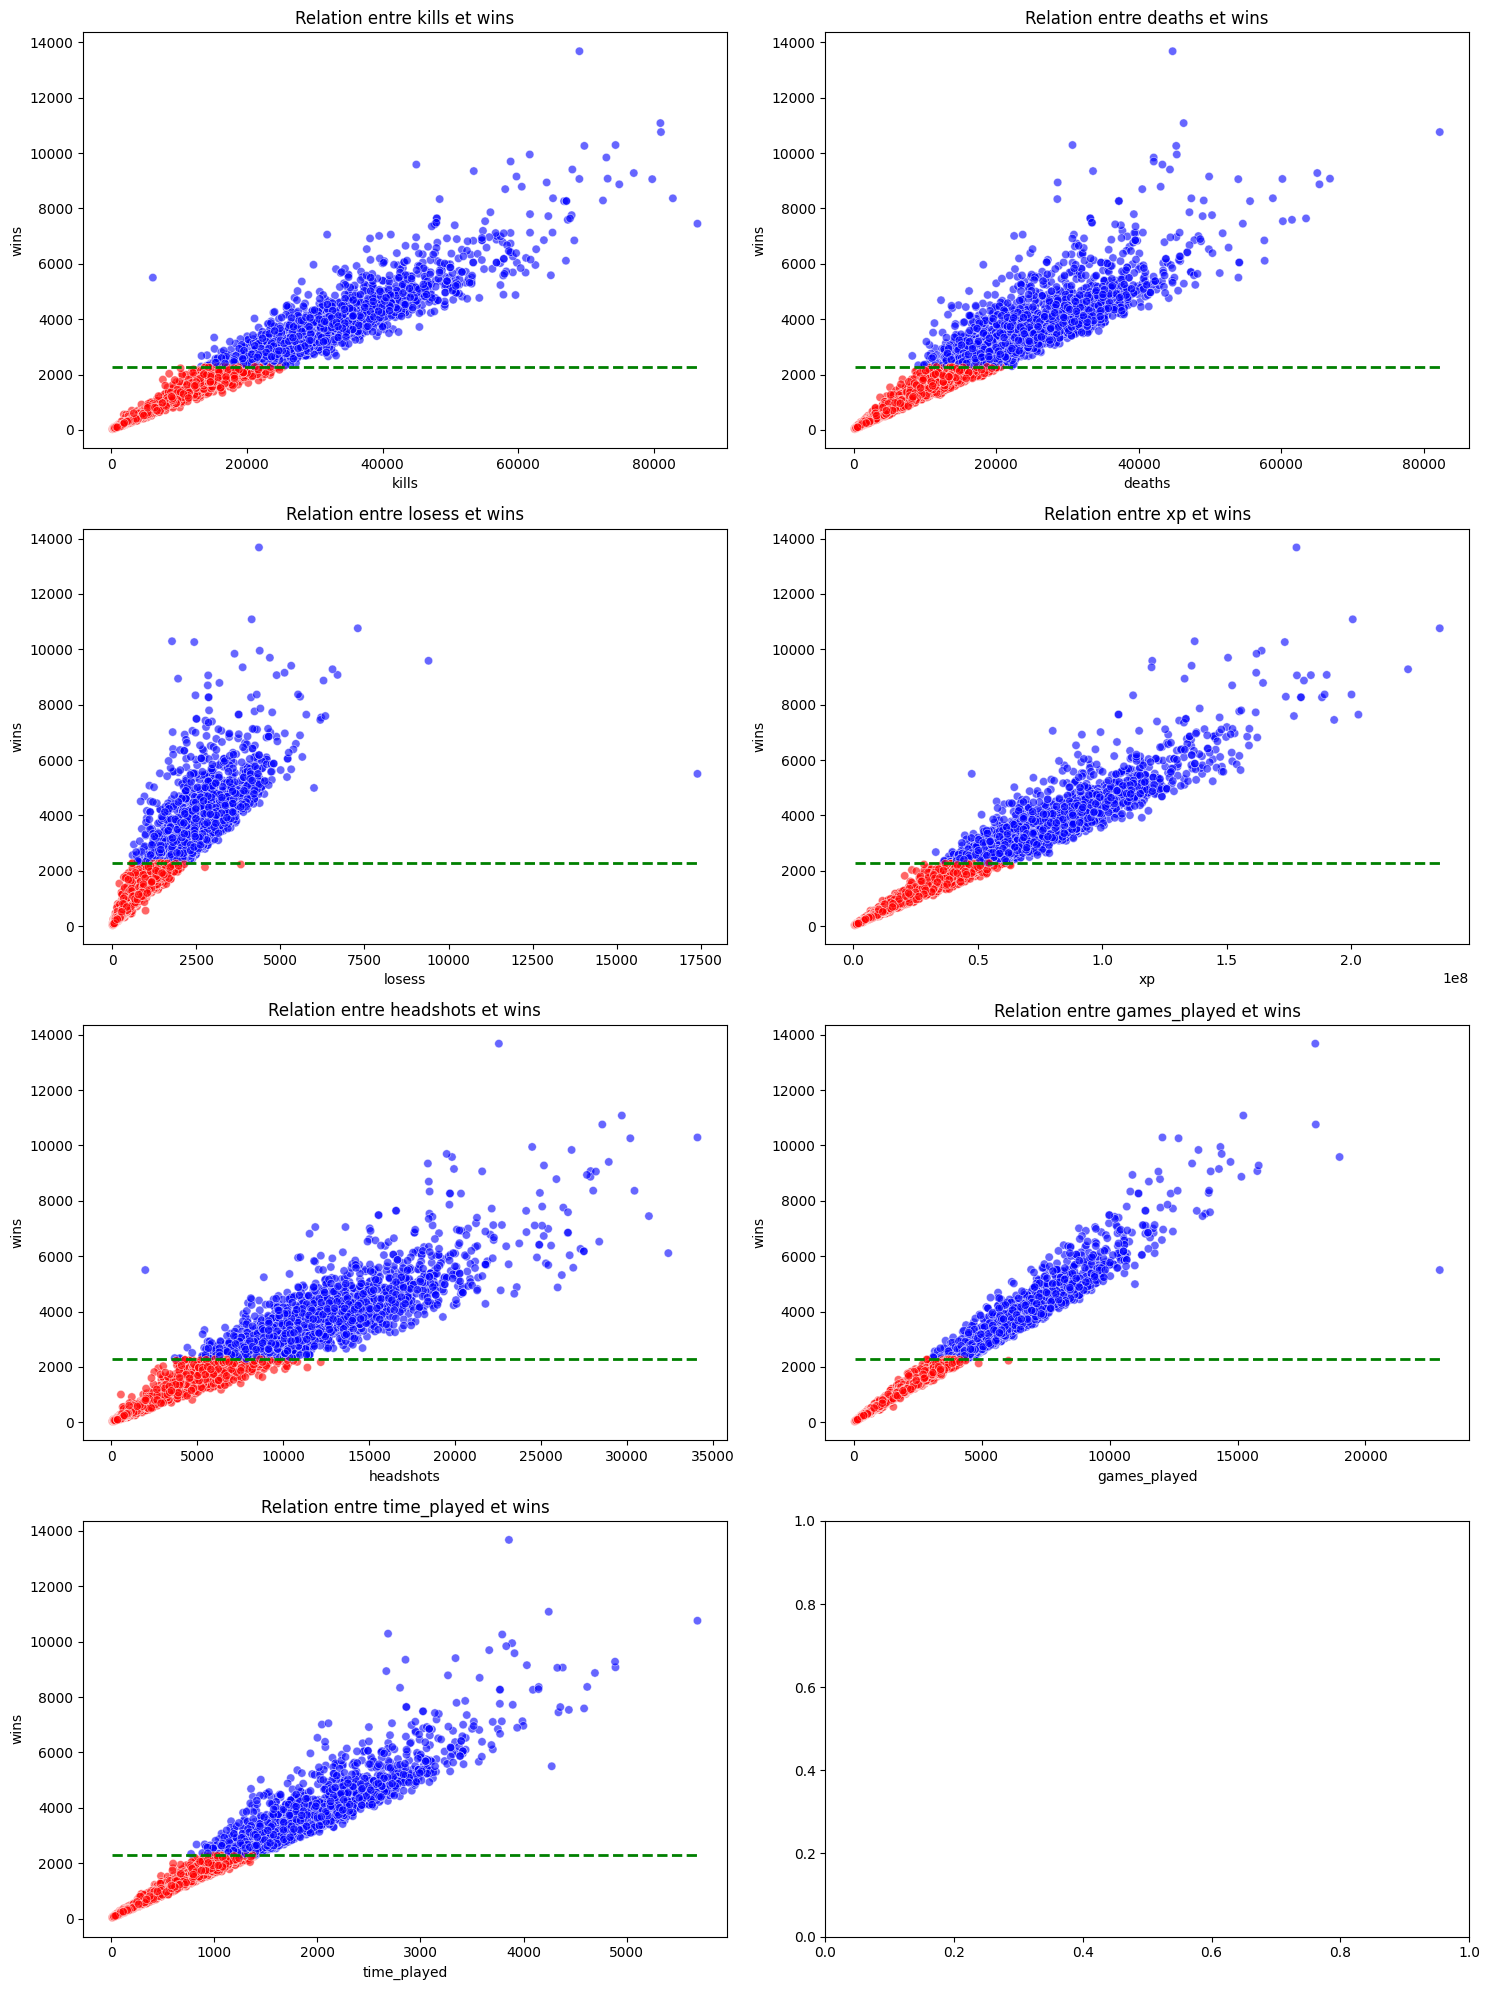

In [19]:



GoodDataTomClancy['median_wins'] = (GoodDataTomClancy['wins'] > mediane_wins).astype(int)

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(x=var, y='wins', hue='median_wins', data=GoodDataTomClancy, ax=axes[i],
                    palette={1: 'blue', 0: 'red'}, alpha=0.6, legend=False)
    
    X = GoodDataTomClancy[[var]]
    y = GoodDataTomClancy['median_wins']
    model = LogisticRegression().fit(X, y)
    
    x_range = np.linspace(X[var].min(), X[var].max(), 200).reshape(-1, 1)
    decision_boundary = model.predict_proba(x_range)[:, 1] >= 0.5
    y_boundary = np.full(x_range.shape, mediane_wins)
    
    axes[i].plot(x_range, y_boundary, color='green', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('wins')

plt.tight_layout()
plt.show()


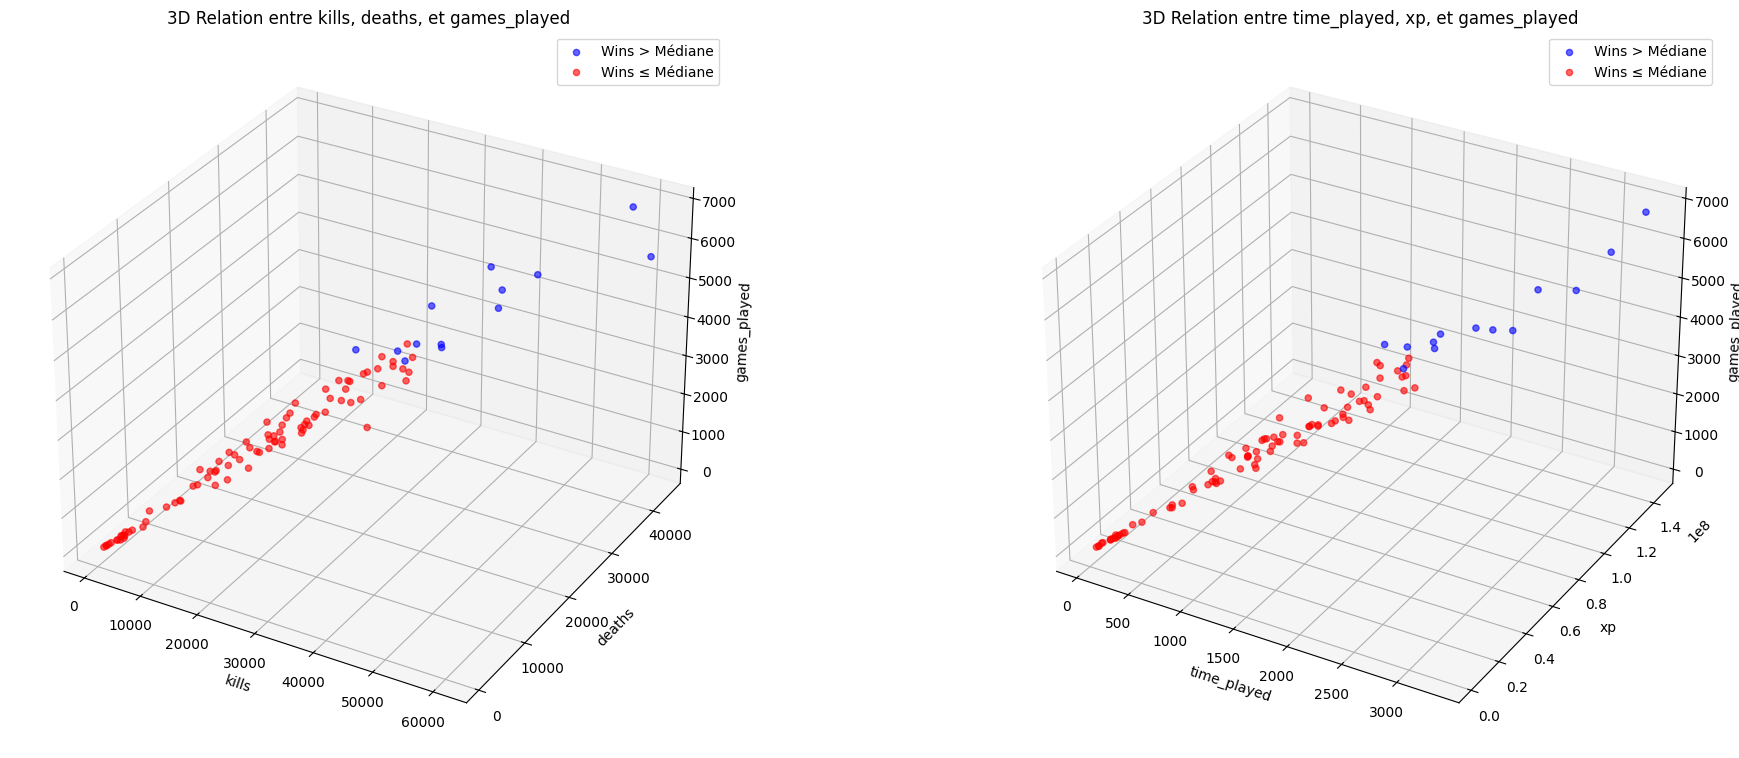

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

sample_data = GoodDataTomClancy.sample(n=100, random_state=1)
important_pairs = [('kills', 'deaths'), ('time_played', 'xp')]
median_wins = sample_data['games_played'].median()

fig = plt.figure(figsize=(20, 15))

for i, (x_var, y_var) in enumerate(important_pairs):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    subset_above = sample_data[sample_data['wins'] > median_wins]
    subset_below = sample_data[sample_data['wins'] <= median_wins]

    ax.scatter(subset_above[x_var], subset_above[y_var], subset_above['wins'], 
               color='blue', alpha=0.6, label='Wins > Médiane')

    ax.scatter(subset_below[x_var], subset_below[y_var], subset_below['wins'], 
               color='red', alpha=0.6, label='Wins ≤ Médiane')

    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_zlabel('games_played')
    ax.set_title(f'3D Relation entre {x_var}, {y_var}, et games_played')
    ax.legend()

plt.tight_layout()
plt.show()


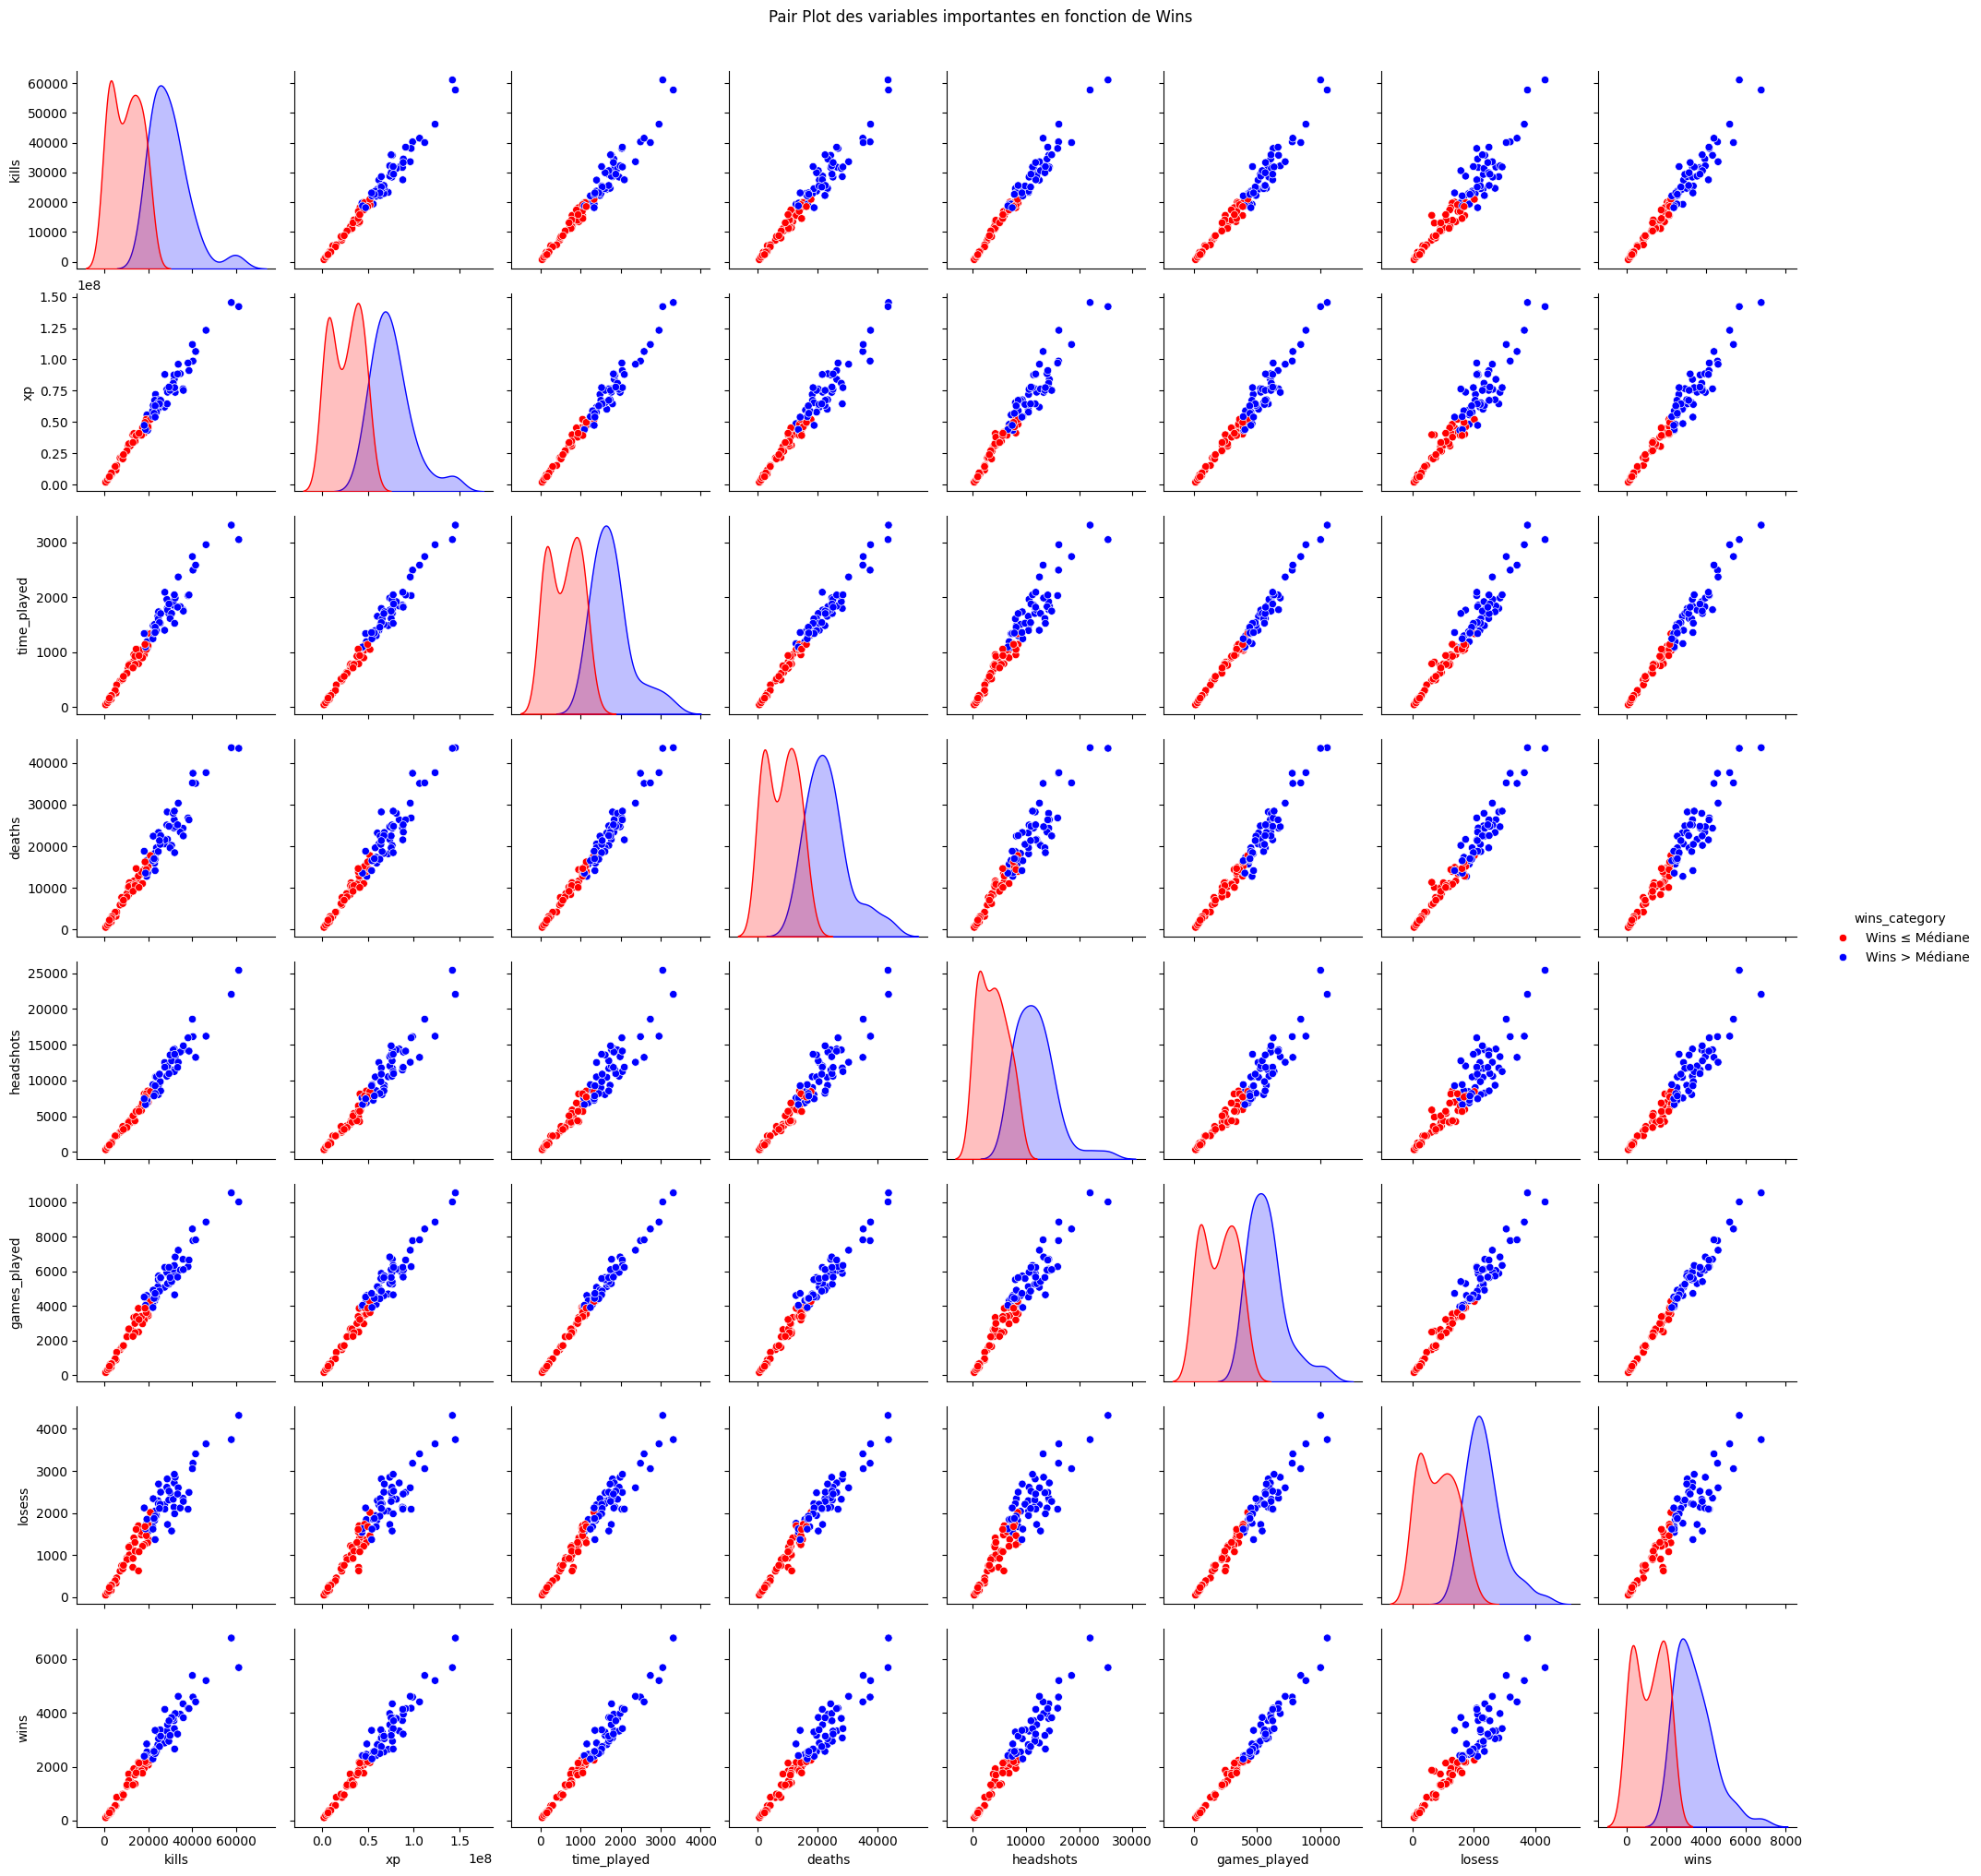

In [21]:


sample_data = GoodDataTomClancy.sample(n=100, random_state=1)
important_vars = ['kills', 'xp', 'time_played', 'deaths', 'headshots', 'games_played', 'losess', 'wins']

sample_data['wins_category'] = np.where(sample_data['wins'] > sample_data['wins'].median(), 'Wins > Médiane', 'Wins ≤ Médiane')

sns.pairplot(sample_data[important_vars + ['wins_category']], hue='wins_category', palette={'Wins > Médiane': 'blue', 'Wins ≤ Médiane': 'red'})
plt.suptitle('Pair Plot des variables importantes en fonction de Wins', y=1.02)
plt.show()


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:



filtered_wins_category_1 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 1].head(4)
filtered_wins_category_0 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 0].head(4)

print("mediane_wins : ",mediane_wins)



mediane_wins :  2286.0


In [24]:
filtered_wins_category_1

kills  deaths  losess         xp  headshots  games_played  time_played  \
0  39693   27208    2524   87180363      16789          6487         2105   
1  52978   31853    2716  111206504      18196          9048         2440   
2  32141   31353    2892   89109230      12652          7417         2184   
3  44525   33800    3030  111741958      18692          7753         2481   

   wins  median_wins  
0  3963            1  
1  6332            1  
2  4525            1  
3  4723            1

In [25]:
filtered_wins_category_0

kills  deaths  losess        xp  headshots  games_played  time_played  \
10   4180    3088     184  10658571       1535           727          217   
14   4281    2930     286   9024784       1806           724          235   
15   7026    5503     412  18730457       2332          1310          393   
18  16922   12395     713  42095357       6715          2977          943   

    wins  median_wins  
10   543            0  
14   438            0  
15   898            0  
18  2264            0

In [26]:
import numpy as np
random_state_value = np.random.randint(0, 101)
test_final = GoodDataTomClancy.sample(n=10, random_state=random_state_value)
sample_data_GoodDataTomClancy = GoodDataTomClancy.drop(test_final.index)
print("random_state_value :",random_state_value)


random_state_value : 23


In [27]:
test_final

kills  deaths  losess         xp  headshots  games_played  time_played  \
1070   3901    2797     276    8975023       1570           639          205   
72    56777   36153    2802  145240334      24152          9673         3026   
2510  15867   11628    1117   39017346       6292          2739          881   
4819  30665   32848    3088   88248274      12591          7091         2215   
1814   3717    2240     181    8103179       1696           674          200   
843   12006   10197    1040   29449919       4509          2467          747   
1286  28025   27679    2874   75190870      10548          6484         1956   
2200   8406    7829     864   20025967       3023          1800          564   
2024   5716    4222     380   12710634       1851           930          311   
4551   2891    2530     238    7908366       1080           564          180   

      wins  median_wins  
1070   363            0  
72    6871            1  
2510  1622            0  
4819  4003            1  
1814   493            0  
843   1427            0  
1286  3610            1  
2200   936            0  
2024   550            0  
4551   326            0

In [28]:
sample_data_GoodDataTomClancy

kills  deaths  losess         xp  headshots  games_played  time_played  \
0     39693   27208    2524   87180363      16789          6487         2105   
1     52978   31853    2716  111206504      18196          9048         2440   
2     32141   31353    2892   89109230      12652          7417         2184   
3     44525   33800    3030  111741958      18692          7753         2481   
4     16972   18249    1965   46063186       5785          4695         1337   
...     ...     ...     ...        ...        ...           ...          ...   
5030  13666   11456    1300   36238617       5610          3313          943   
5031  18195   15780    1534   45513073       7542          3394         1082   
5032   1952    1758     145    5002072        760           395          118   
5033  16925   13373    1479   41782162       5803          3395         1039   
5034  12330   11086    1167   33804976       4555          2757          797   

      wins  median_wins  
0     3963            1  
1     6332            1  
2     4525            1  
3     4723            1  
4     2730            1  
...    ...          ...  
5030  2013            0  
5031  1860            0  
5032   250            0  
5033  1916            0  
5034  1590            0  

[5025 rows x 9 columns]

In [29]:
test_final.shape

(10, 9)

In [30]:
sample_data_GoodDataTomClancy.shape

(5025, 9)

In [31]:

X = sample_data_GoodDataTomClancy.drop(columns=['median_wins', 'wins']).apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(sample_data_GoodDataTomClancy['median_wins'], errors='coerce')

print("Longueur de X :", len(X))
print("Longueur de y :", len(y))


Longueur de X : 5025
Longueur de y : 5025


In [32]:
X.head(2)

kills  deaths  losess         xp  headshots  games_played  time_played
0  39693   27208    2524   87180363      16789          6487         2105
1  52978   31853    2716  111206504      18196          9048         2440

In [33]:
y.head(2)

0    1
1    1
Name: median_wins, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

kills  deaths  losess         xp  headshots  games_played  time_played
3682   6018    4632     540   15950315       2247          1186          340
3984   9792    9559     991   22013171       3721          2086          619
151   36340   27299    2366   90919003      14705          6578         2067
1455    558     342      24    1341944        224           100           28
4438  24904   15990    1729   60972223       8671          4000         1327
...     ...     ...     ...        ...        ...           ...          ...
4434  18864   15382    1521   52734848       8205          3438         1136
467   49954   33065    2719  124406138      19616          8703         2681
3100  28014   21194    2161   67922184      11747          5773         1589
3780  35526   30150    3212  101150787      13418          7597         2433
862    2380    2105     198    7307625        854           541          170

[4020 rows x 7 columns]

In [36]:
y_train

3682    0
3984    0
151     1
1455    0
4438    0
       ..
4434    0
467     1
3100    1
3780    1
862     0
Name: median_wins, Length: 4020, dtype: int32

c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.joblib'.


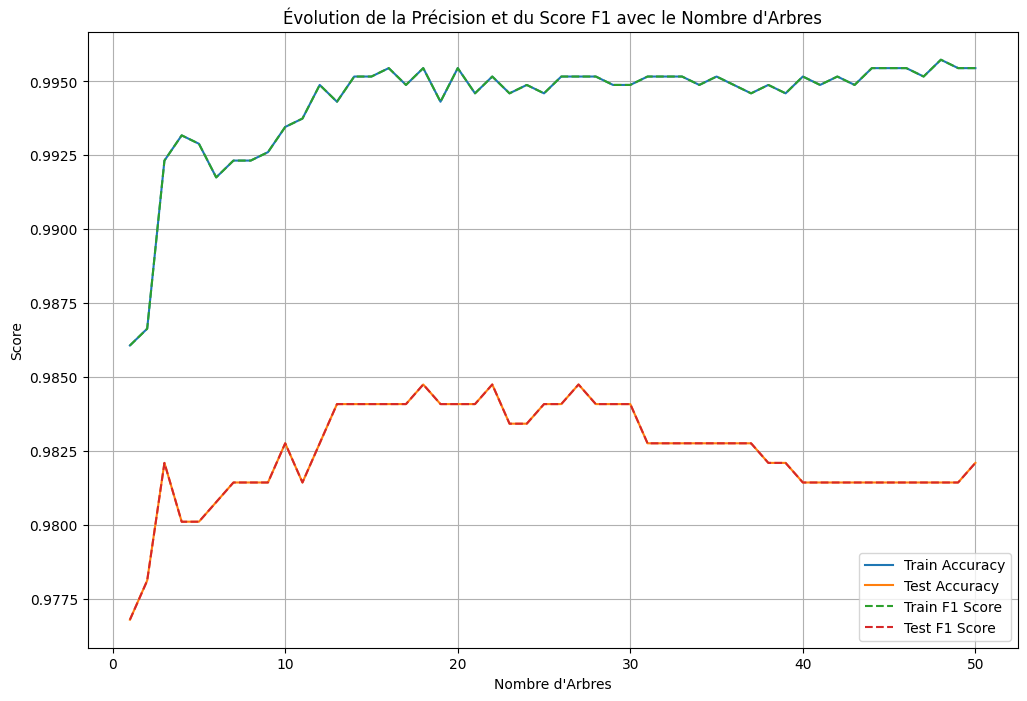

Résultats finaux:
Précision finale sur l'entraînement: 1.00
Précision finale sur le test: 0.98
Score F1 final sur l'entraînement: 1.00
Score F1 final sur le test: 0.98
Précision finale sur le test: 0.98
Rappel final sur le test: 0.98

Matrice de confusion pour l'ensemble de test:
[[743  11]
 [ 16 738]]


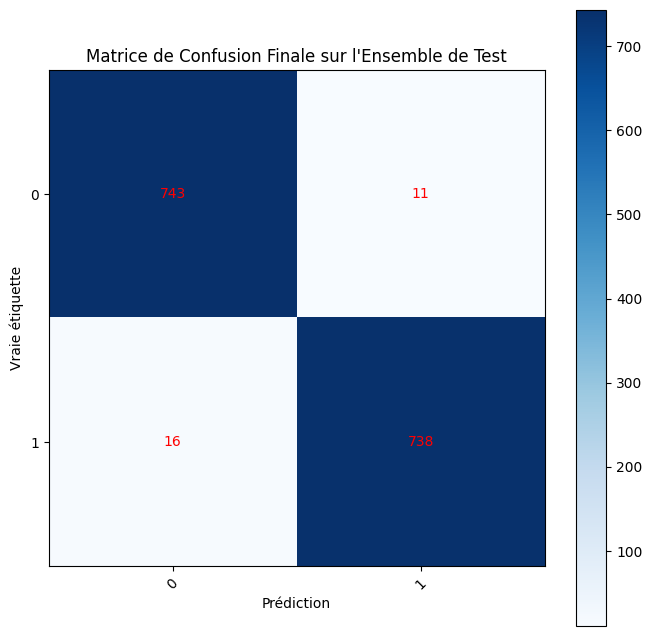

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

n_estimators = 50
trees = []
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

final_train_predictions = np.zeros(len(X_train))
final_test_predictions = np.zeros(len(X_test))

kf = StratifiedKFold(n_splits=5)

for i in range(1, n_estimators + 1):
    bootstrap_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]
    
    tree = DecisionTreeClassifier(max_depth=5, random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)
    
    train_preds = np.array([tree.predict(X_train) for tree in trees])
    test_preds = np.array([tree.predict(X_test) for tree in trees])
    
    train_pred_majority = (np.sum(train_preds, axis=0) >= i / 2).astype(int)
    test_pred_majority = (np.sum(test_preds, axis=0) >= i / 2).astype(int)
    
    train_accuracy = accuracy_score(y_train, train_pred_majority)
    train_f1 = f1_score(y_train, train_pred_majority, average='weighted')
    test_accuracy = accuracy_score(y_test, test_pred_majority)
    test_f1 = f1_score(y_test, test_pred_majority, average='weighted')
    
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_accuracy)
    test_f1_scores.append(test_f1)
    
    if i == n_estimators:
        final_train_predictions = train_pred_majority
        final_test_predictions = test_pred_majority

dump(trees, 'ensemble_trees.joblib')
print("Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.joblib'.")

plt.figure(figsize=(12, 8))
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_accuracies, label='Test Accuracy')
plt.plot(range(1, n_estimators + 1), train_f1_scores, label='Train F1 Score', linestyle='--')
plt.plot(range(1, n_estimators + 1), test_f1_scores, label='Test F1 Score', linestyle='--')
plt.xlabel("Nombre d'Arbres")
plt.ylabel("Score")
plt.title("Évolution de la Précision et du Score F1 avec le Nombre d'Arbres")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

final_train_accuracy = accuracy_score(y_train, final_train_predictions)
final_test_accuracy = accuracy_score(y_test, final_test_predictions)
final_train_f1 = f1_score(y_train, final_train_predictions, average='weighted')
final_test_f1 = f1_score(y_test, final_test_predictions, average='weighted')
final_precision = precision_score(y_test, final_test_predictions, average='weighted')
final_recall = recall_score(y_test, final_test_predictions, average='weighted')

print("Résultats finaux:")
print(f"Précision finale sur l'entraînement: {final_train_accuracy:.2f}")
print(f"Précision finale sur le test: {final_test_accuracy:.2f}")
print(f"Score F1 final sur l'entraînement: {final_train_f1:.2f}")
print(f"Score F1 final sur le test: {final_test_f1:.2f}")
print(f"Précision finale sur le test: {final_precision:.2f}")
print(f"Rappel final sur le test: {final_recall:.2f}")

conf_matrix = confusion_matrix(y_test, final_test_predictions)
print("\nMatrice de confusion pour l'ensemble de test:")
print(conf_matrix)

plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion Finale sur l'Ensemble de Test")
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
class_labels = list(set(y_test))
plt.xticks(tick_marks, labels=class_labels, rotation=45)
plt.yticks(tick_marks, labels=class_labels)
plt.ylabel('Vraie étiquette')
plt.xlabel('Prédiction')
plt.grid(False)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{conf_matrix[i, j]}", ha="center", va="center", color="red")

plt.show()


In [38]:
X_final_test = test_final.drop(columns=['median_wins', 'wins'])
y_final_test = test_final['median_wins']

X_final_test = X_final_test[X_train.columns] 

final_predictions = []
for tree in trees:
    pred = tree.predict(X_final_test)
    final_predictions.append(pred)

final_predictions = np.array(final_predictions)

final_pred_majority = (np.sum(final_predictions, axis=0) >= n_estimators / 2).astype(int)

results = pd.DataFrame({
    'Actual': y_final_test.values,
    'Predicted': final_pred_majority
})
results['Result'] = np.where(results['Actual'] == results['Predicted'], '✅', '❌')
results.index = test_final.index 

display(results)



c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

Actual  Predicted Result
1070       0          0      ✅
72         1          1      ✅
2510       0          0      ✅
4819       1          1      ✅
1814       0          0      ✅
843        0          0      ✅
1286       1          1      ✅
2200       0          0      ✅
2024       0          0      ✅
4551       0          0      ✅